# Chapter02 1次元データの整理

In [525]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plot_util import plot_var_interact, plot_std_interact

# Jupyter Notebookの出力を小数点以下第3位に抑える
%precision 3

# DataFrameの出力を小数点以下第3位に抑える
# pd.set_option('precision', 3)
pd.set_option('display.precision', 3)

# グラフがnotebook上に表示されるようにする
%matplotlib inline

In [526]:
df = pd.read_csv('../data/ch2_scores_em.csv', index_col='生徒番号')

# dfの最初の5行を表示
df.head()

,英語,数学
生徒番号,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [527]:
scores = np.array(df['英語'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [528]:
scores_df = pd.DataFrame(
    {'点数':scores},
    index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    name='生徒')
)
scores_df

,点数
生徒,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


## 2.1 データの中心の指標

### 2.1.1 平均（mean）

In [529]:
sum(scores) / len(scores)

55.000

In [530]:
np.mean(scores)

55.000

In [531]:
scores_df.mean()

点数    55.0
dtype: float64

### 2.1.2 中央値（median）

In [532]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [533]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) /2
else:
    median = sorted_scores[(n+1)//2 - 1]
median

56.500

In [534]:
np.median(scores)

56.500

In [535]:
scores_df.median()

点数    56.5
dtype: float64

### 2.1.3 最頻値（mode）

In [536]:
pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

## 2.2 データのばらつきの指標

### 2.2.1 分散と標準偏差

- 偏差（deviation）
- 分散（variance）
- 標準偏差（Standard deviation）

In [537]:
# deviation
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [538]:
summary_df = scores_df.copy()
summary_df['偏差'] = deviation
summary_df

,点数,偏差
生徒,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [539]:
summary_df.mean()

点数    55.0
偏差     0.0
dtype: float64

In [540]:
# variance
np.mean(deviation ** 2)

86.000

In [541]:
np.var(scores)

86.000

In [542]:
scores_df.var()

点数    95.556
dtype: float64

In [543]:
scores_df.var(ddof=0)

点数    86.0
dtype: float64

In [544]:
scores_df.var(ddof=1)

点数    95.556
dtype: float64

- Numpy 分散
  - 標本分散
  - $ S^2 = \dfrac{1}{n} \displaystyle\sum_{i=1}^n (x_i - \bar{x}) $
- Pandas 分散
  - 不偏分散
  - $ S^2 = \dfrac{1}{n-1} \displaystyle\sum_{i=1}^n (x_i - \bar{x}) $

In [545]:
summary_df['偏差二乗'] = np.square(deviation)
summary_df

,点数,偏差,偏差二乗
生徒,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [546]:
summary_df.mean()

点数      55.0
偏差       0.0
偏差二乗    86.0
dtype: float64

In [547]:
plot_var_interact(scores[:4])

interactive(children=(IntSlider(value=42, description='A', min=1), IntSlider(value=69, description='B', min=1)…

In [548]:
np.sqrt(np.var(scores, ddof=0))

9.274

In [549]:
np.std(scores, ddof=0)

9.274

In [550]:
plot_std_interact(scores)

interactive(children=(IntSlider(value=42, description='A', min=1), IntSlider(value=69, description='B', min=1)…

### 2.2.2 範囲と四分位範囲

- 範囲（range）
  - $ R_g = x_{max} - x_{min} $
- 四分位範囲（interquartile range）
  - $ IQR = Q3 - Q1 $

In [551]:
# range
np.max(scores) - np.min(scores)

28

In [552]:
# interquatile range
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000

In [553]:
scores_Q2 =  np.percentile(scores, 50)
scores_Q2

56.500

In [554]:
np.median(scores)

56.500

In [555]:
# 2.2.3 データの指標のまとめ
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

## 2.3 データの正規化

- 正規化（normalization）

### 2.3.1 標準化

- 標準化（standardization）
  - 基準化変量（standardized data）
  - z-score
  - $ z_i = \dfrac{x_i - \bar{x}}{S} $

In [556]:
# テストの点の標準化
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [557]:
# 標準化されたデータは、平均:0、標準偏差:1 となる
np.mean(z), np.std(z)

(-0.000, 1.000)

### 2.3.2 偏差値

- 平均:50、標準偏差:10 になるように正規化した値
- $ z_i = 50 + 10 * \dfrac{x_i - \bar{x}}{S} $

In [558]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [559]:
scores_df['偏差値'] = z
scores_df

,点数,偏差値
生徒,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


## 2.4 1次元データの視覚化

In [560]:
# 50人分の英語の点数のarray
english_scores = np.array(df['英語'])

# Seriesに変換してdescribeを表示する
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

### 2.4.1 度数分布表

- 階級（class）
- 度数（frequency）
- 階級幅
- 階級数（bins）

In [561]:
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [562]:
# 0~10, 10~20, ...という文字列のリストを作成する
freq_class = [f"{i}~{i+10}" for i in range(0, 100, 10)]

# freq_classをインデックスにしてfreqでDataFrameを作成する
freq_dist_df = pd.DataFrame(
    {'度数': freq},
    index=pd.Index(freq_class, name='階級')
)
freq_dist_df

,度数
階級,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [563]:
# 階級値（階級の中央値）のリストを作成する
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [564]:
# 相対度数（全データに対してその階級の割合）のリストを作成する
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [565]:
# 涙声相対度数（その階級までの累積和）のarrayを作成する
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [567]:
# freq_dist_dfに追加する
freq_dist_df['階級値'] = class_value
freq_dist_df['相対度数'] = rel_freq
freq_dist_df['累積相対度数'] = cum_rel_freq
# 項目の並び替え
freq_dist_df= freq_dist_df[['階級値', '度数', '相対度数', '累積相対度数']]
freq_dist_df

,階級値,度数,相対度数,累積相対度数
階級,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [569]:
# 最頻値を求める
freq_dist_df.loc[freq_dist_df['度数'].idxmax(), '階級値']

65

### 2.4.2 ヒストグラム（histogram）

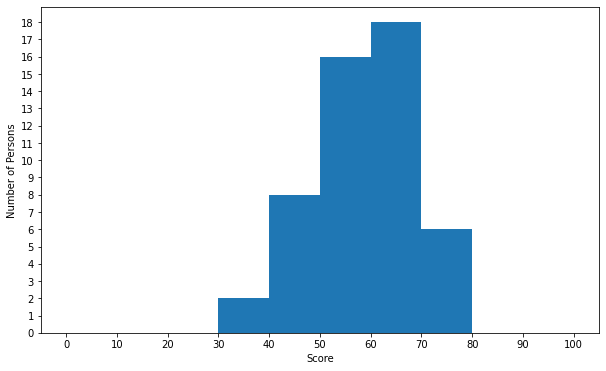

In [570]:
# キャンバスを作成する
# figsizeで横・縦の大きさを指定する
fig = plt.figure(figsize=(10, 6))

# キャンバス上にフラフを描画するための領域を作成する
# 引数は領域1x1個作り、1つ目の領域に描画するすることを意味する
ax = fig.add_subplot(111)

# 階級数:10のヒストグラムを描画する
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))

# 軸にラベルを付ける
ax.set_xlabel('Score')
ax.set_ylabel('Number of Persons')

# 目盛りをふる
ax.set_xticks(np.linspace(0, 100, 10+1))
ax.set_yticks(np.arange(0, freq.max()+1))

# グラフの表示
plt.show()

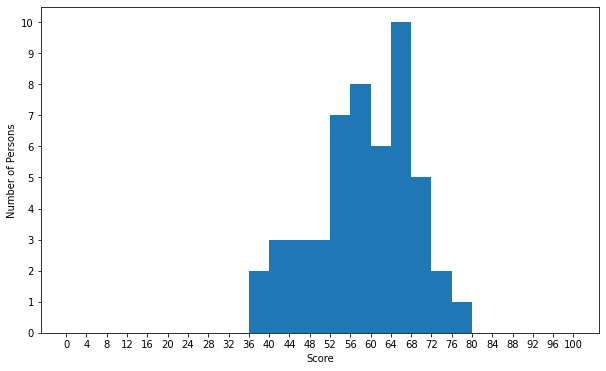

In [572]:
# キャンバスを作成する
# figsizeで横・縦の大きさを指定する
fig = plt.figure(figsize=(10, 6))

# キャンバス上にフラフを描画するための領域を作成する
# 引数は領域1x1個作り、1つ目の領域に描画するすることを意味する
ax = fig.add_subplot(111)

# 階級数:25のヒストグラムを描画する
freq, _, _ = ax.hist(english_scores, bins=25, range=(0, 100))

# 軸にラベルを付ける
ax.set_xlabel('Score')
ax.set_ylabel('Number of Persons')

# 目盛りをふる
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))

# グラフの表示
plt.show()

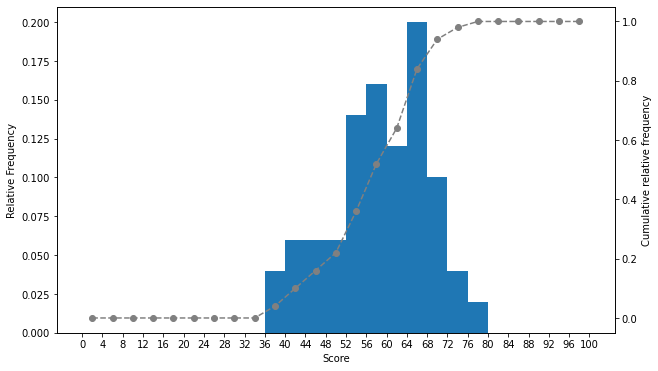

In [576]:
# 「累積相対度数の折れ線グラフ」と「相対度数のヒストグラム」を表示する
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)

# Y軸にスケールの違うグラフをax1と同じ領域に描画できるようにする
ax2 = ax1.twinx()

# 相対度数をひすとぐらむにするために、度数をデータ数で割る
# hist()の引数weightを指定することで実現できる
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25, range=(0, 100), weights=weights)
cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]

# 折れ線グラフの描画
# 引数lsを`--`にすることで、線が点線になる
# 引数markerを`o`にすることで、データ点が丸になる
# 引数colorを`gray`することで、線の色を灰色にする
ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray')

# 折れ線グラフの罫線を消去する
ax2.grid(visible=False)

# ラベル・目盛りの設定
ax1.set_xlabel('Score')
ax1.set_ylabel('Relative Frequency')
ax2.set_ylabel('Cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))


### 2.4.3 箱ひげ図（box plot）

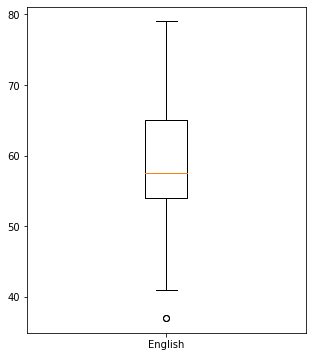

In [577]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['English'])

plt.show()